In [1]:
# imprescindible
import pandas as pd
import numpy as np

# to avoid some warnings messages
import warnings
warnings.filterwarnings('ignore')

# to draw some graphs
import seaborn as sns
import matplotlib.pyplot as plt

# set seaborn and matplotlib default theme
sns.set_theme()
_sns_plotting_contex_ = sns.plotting_context()
sns.plotting_context('poster')

# set seaborn and matplotlib style to ...
# plt.style.use('classic')
sns.mpl.rcParams['axes.titlesize'] = 18
sns.mpl.rcParams['axes.labelsize'] = 14

# to use HTML codes within IPpython.display function
from IPython.display import HTML



In [26]:
def set_figure(row, col, suptitle=None) :
    u''' Activate matplot figure setting size and super title
    '''
    fig = plt.figure(figsize=(row, col));
    if suptitle != None :
        fig.suptitle(suptitle, 
                     verticalalignment='center', fontsize='xx-large', fontweight='extra bold');
    return fig

In [12]:
X_test = test_raw.iloc[:,0:280]
y_test = test_raw.iloc[:,-1]

y_test = y_test.apply(lambda v : 0 if v <= 50 else 1)

# using train scaler
X_test = scaler.transform(X_test)

for m in models :
    y_pred = m.model.predict(X_test)
    display(HTML('<b>' + m.name + '</b>'))
    print(classification_report(y_test, y_pred, digits=6, target_names=None, output_dict=False))


              precision    recall  f1-score   support

           0   0.968750  0.009018  0.017870      6875
           1   0.050661  0.142857  0.074797       161
           2   0.000000  0.000000  0.000000         0

    accuracy                       0.012081      7036
   macro avg   0.339804  0.050625  0.030889      7036
weighted avg   0.947742  0.012081  0.019173      7036



              precision    recall  f1-score   support

           0   0.979063  0.999855  0.989349      6875
           1   0.000000  0.000000  0.000000       161
           2   0.000000  0.000000  0.000000         0

    accuracy                       0.976976      7036
   macro avg   0.326354  0.333285  0.329783      7036
weighted avg   0.956660  0.976976  0.966711      7036



              precision    recall  f1-score   support

           0   0.984609  0.995636  0.990092      6875
           1   0.576923  0.186335  0.281690       161
           2   0.000000  0.000000  0.000000         0

    accuracy                       0.977118      7036
   macro avg   0.520511  0.393991  0.423927      7036
weighted avg   0.975280  0.977118  0.973882      7036



In [16]:

from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### Data

In [3]:
data_raw = pd.read_csv("./data/blogData_train.csv", header=None)
data_raw.drop_duplicates(inplace=True)

In [4]:
data_raw.shape

(49203, 281)

In [5]:
to_classes = lambda v : 0 if v <= 50 else (1 if v <= 100 else (2 if v <= 150 else (3 if v <= 200 else 4)))

In [6]:
X_train = data_raw.iloc[:,0:280]
y_train = data_raw.iloc[:,-1]

y_train = y_train.apply(to_classes)

In [7]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [8]:
# RMSE = lambda v: round(np.sqrt(v), 4)

class Model :
    def __init__(self, name, model) :
        self.name = name
        self.model = model
        return    


In [9]:

models = []
models.append( Model('Naive Bayes Gaussian', 
                     GaussianNB() 
                    ) 
             )

models.append( Model('Random Forest Classifier', 
                     RandomForestClassifier(
                         n_estimators=100, 
                         criterion='gini', 
                         max_depth=3, 
                         bootstrap=True, 
                         n_jobs=-1, 
                         max_samples=0.3, 
                         random_state=127
                     ) 
                    ) 
             )

models.append( Model('Gradient Boosting Classifier', 
                     GradientBoostingClassifier(
                         # loss='log_loss', # loss function to optimize ???
                         learning_rate=0.1, # contribution of each tree
                         n_estimators=100, # large values -> better performance
                         subsample=1, #  values < 1.0 -> low variance and high bias
                         criterion='friedman_mse', # measure the quality of a split
                         max_depth=3, # tree depth limits the number of nodes
                         random_state=127
                     ) 
                    ) 
             )


for m in models :
    m.model.fit(X_train, y_train)
    y_pred = m.model.predict(X_train)
    display(HTML('<b>' + m.name + '</b>'))
    print(classification_report(y_train, y_pred, digits=6, target_names=None, output_dict=False))


              precision    recall  f1-score   support

           0   1.000000  0.013303  0.026257     47884
           1   0.027010  0.075949  0.039848       553
           2   0.014075  0.080972  0.023981       247
           3   0.003125  0.985714  0.006230       140
           4   0.037167  0.139842  0.058726       379

    accuracy                       0.018088     49203
   macro avg   0.216275  0.259156  0.031008     49203
weighted avg   0.973862  0.018088  0.026591     49203



              precision    recall  f1-score   support

           0   0.976776  0.999561  0.988037     47884
           1   0.000000  0.000000  0.000000       553
           2   0.000000  0.000000  0.000000       247
           3   0.000000  0.000000  0.000000       140
           4   0.668317  0.356201  0.464716       379

    accuracy                       0.975510     49203
   macro avg   0.329019  0.271152  0.290551     49203
weighted avg   0.955739  0.975510  0.965130     49203



              precision    recall  f1-score   support

           0   0.985919  0.998684  0.992260     47884
           1   0.654709  0.264014  0.376289       553
           2   0.886076  0.283401  0.429448       247
           3   0.859155  0.435714  0.578199       140
           4   0.822086  0.707124  0.760284       379

    accuracy                       0.982989     49203
   macro avg   0.841589  0.537788  0.627296     49203
weighted avg   0.980072  0.982989  0.979547     49203



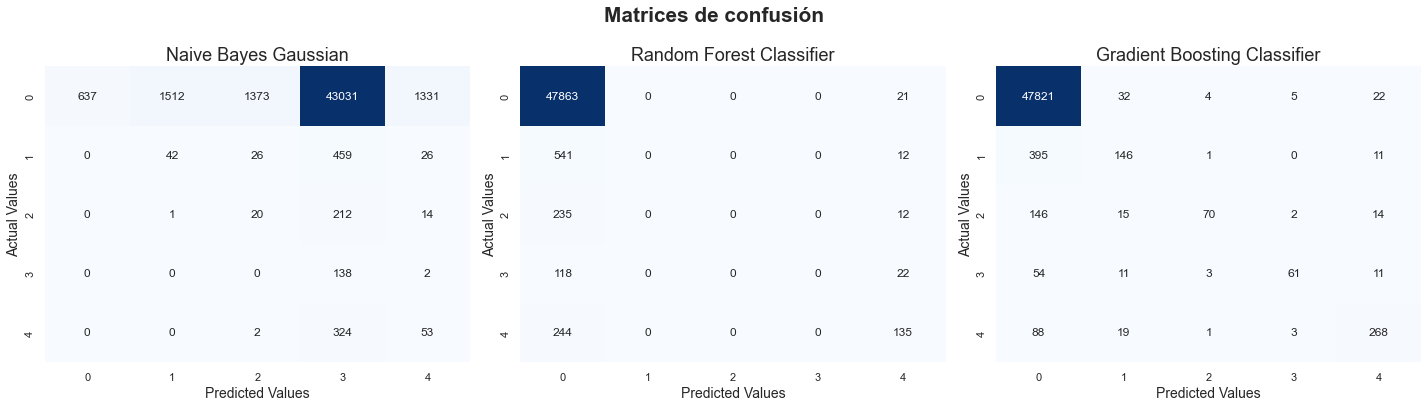

In [28]:
fig = set_figure(20, 10, 'Matrices de confusión')
cols = 3
rows = (len(models) // cols) + 1

for i, m in enumerate(models) :
    y_pred = m.model.predict(X_train)
    
    plt.subplot(rows, cols, i+1)
    ax=sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, fmt="d", cmap='Blues', cbar=False)
    plt.tight_layout();
    plt.title(m.name);
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')
   


---

In [10]:
import os

In [11]:

filepath = './data/test/'
filelist = [os.path.join(filepath, filename) for filename in os.listdir(filepath) if os.path.isfile(os.path.join(filepath, filename))]


In [12]:

test_raw = pd.DataFrame()

for filename in filelist :
    temp_raw = pd.read_csv(filename, header=None)
    temp_raw.drop_duplicates(inplace=True)
    test_raw = test_raw.append(temp_raw)

test_raw.shape

(7036, 281)

In [13]:
X_test = test_raw.iloc[:,0:280]
y_test = test_raw.iloc[:,-1]

y_test = y_test.apply(to_classes)

# using train scaler
X_test = scaler.transform(X_test)

for m in models :
    y_pred = m.model.predict(X_test)
    display(HTML('<b>' + m.name + '</b>'))
    print(classification_report(y_test, y_pred, digits=6, target_names=None, output_dict=False))


              precision    recall  f1-score   support

           0   0.946667  0.010327  0.020432      6875
           1   0.026906  0.090909  0.041522        66
           2   0.000000  0.000000  0.000000        36
           3   0.002191  1.000000  0.004372        14
           4   0.004651  0.022222  0.007692        45

    accuracy                       0.013076      7036
   macro avg   0.196083  0.224692  0.014804      7036
weighted avg   0.925291  0.013076  0.020412      7036



              precision    recall  f1-score   support

           0   0.978645  0.999855  0.989136      6875
           1   0.000000  0.000000  0.000000        66
           2   0.000000  0.000000  0.000000        36
           3   0.000000  0.000000  0.000000        14
           4   0.750000  0.200000  0.315789        45

    accuracy                       0.978255      7036
   macro avg   0.345729  0.239971  0.260985      7036
weighted avg   0.961048  0.978255  0.968522      7036



              precision    recall  f1-score   support

           0   0.983456  0.994327  0.988862      6875
           1   0.111111  0.060606  0.078431        66
           2   0.153846  0.055556  0.081633        36
           3   0.000000  0.000000  0.000000        14
           4   0.529412  0.400000  0.455696        45

    accuracy                       0.974986      7036
   macro avg   0.355565  0.302098  0.320924      7036
weighted avg   0.966167  0.974986  0.970302      7036



---


In [14]:

# esto aplica el/los modelos en cada archivo de test

# for filename in filelist :
#     temp_raw = pd.read_csv(filename, header=None)
#     temp_raw.drop_duplicates(inplace=True)

#     X_test = temp_raw.iloc[:,0:280]
#     y_test = temp_raw.iloc[:,-1]

#     y_test = y_test.apply(to_classes)

#     # using train scaler
#     X_test = scaler.transform(X_test)

#     print('==================')
#     for m in models :
#         y_pred = m.model.predict(X_test)
#         display(HTML('<b>' + m.name + '</b>'))
#         print(classification_report(y_test, y_pred, digits=6, target_names=None, output_dict=False))
